In [1]:
from Neuron import *
from Layers import *
from trainers import *
from data_preps import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Label = 7, index = 6


'\nfor i in range(100):\n    print(train_data[i][1], test_data[i][1])\n'

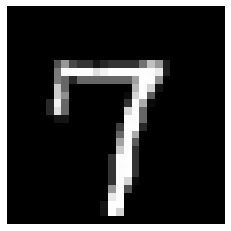

In [2]:
data_X, data_y = visualize_image()

train_data, test_data = data_preparation(data_X, data_y)
'''
for i in range(100):
    print(train_data[i][1], test_data[i][1])
'''

[0,1,3,6,7,8,10,11,16,21]

In [10]:
num_epochs = 1
pics = range(5000,10000)
lr = .001
alpha = 2
g = .7
out_layer = Output_layer(num_exc=10, learning_rate = lr, assymetry=alpha)
in_layer = Input_layer(out_layer, num_exc=28*28, learning_rate=lr, g=g, assymetry=alpha, update_weights=True)
in_layer.make_connections()

In [11]:
in_layer.load_weights(filename='model_checkpoints/07_07_checkpoint_input_10kpics.csv')

In [12]:
for iter in range(num_epochs):
    for p in pics:
        signal = train_data[p][0] * .06
        target = train_data[p][1]
        two_layers_trainer(signal, in_layer,  out_layer, target, power=9, time=40)
    print(f'epoch {iter} completed!')

epoch 0 completed!


In [16]:
in_layer.save_weights(filename='model_checkpoints/07_08_checkpoint_input_10kpics_full.csv')
print('training passed, weights saved')

training passed, weights saved


In [14]:
train_pics = range(1000)

In [15]:
in_layer.weight_dynamics(turn_on=False)
out_layer.drop_impulse()
gts = []
preds = []
#pics = [0,1,3,6,7,8,10,11,16,21]
for i in train_pics:
    for j in range(30):
        in_layer.drop_impulse()
        in_layer.restore_variables()
        out_layer.drop_impulse()
        out_layer.restore_variables()
    signal = test_data[i][0]
    gt = test_data[i][1]
    pred = prediction(signal, [in_layer, out_layer], duration=40, build_plots=False)
    gts.append(gt)
    preds.append(pred)
gts = np.array(gts)
preds = np.array(preds)
print(f'Ground truth: {gts}')
print(f'Predictions: {preds}')
correct_samples = np.sum(preds == gts)
accuracy = correct_samples / len(train_pics)
print(accuracy)

Ground truth: [0 7 7 2 2 6 5 7 8 5 3 0 2 7 6 9 2 3 5 1 6 2 8 0 2 8 9 3 9 4 7 8 4 1 3 9 3
 4 0 8 0 9 1 8 5 5 9 4 1 8 7 7 4 4 3 3 7 5 6 5 4 6 9 6 4 1 5 3 8 0 6 0 0 2
 5 9 9 9 0 1 5 8 9 1 8 1 4 6 1 0 2 1 6 1 6 2 4 3 7 7 5 1 8 3 6 2 7 9 6 3 6
 9 5 1 9 9 5 9 6 6 6 7 9 6 2 7 2 5 8 7 6 3 5 9 3 9 0 4 3 7 7 8 7 4 4 2 4 0
 1 3 1 7 5 3 6 1 2 3 6 5 7 6 3 9 2 9 9 6 4 8 5 3 1 7 4 7 7 8 1 5 3 4 9 8 7
 9 4 0 2 0 9 8 3 9 6 7 5 9 5 1 1 8 7 9 2 5 6 4 0 8 3 1 1 9 5 0 4 2 1 0 5 8
 7 9 3 9 3 9 2 7 2 8 7 1 6 8 1 7 6 1 4 8 3 3 7 9 2 3 4 9 4 5 3 9 0 7 0 2 9
 0 0 9 3 9 9 7 8 2 0 3 5 6 3 7 1 0 1 5 5 2 5 3 3 7 9 2 4 0 5 0 0 1 0 2 7 5
 7 2 1 6 4 0 8 2 0 7 7 6 3 0 9 7 0 2 5 7 7 9 1 0 9 3 7 7 2 6 6 8 9 1 8 7 6
 2 4 8 4 7 1 0 6 9 8 6 5 0 2 2 5 5 4 7 4 9 8 5 7 3 7 1 3 0 9 9 2 4 6 6 1 1
 4 9 5 7 3 0 0 5 5 0 6 6 3 2 4 0 9 2 8 2 9 7 6 3 1 9 7 2 7 9 1 2 7 9 4 4 2
 9 7 8 1 2 7 5 9 1 9 5 0 3 2 4 4 0 5 1 7 3 3 8 2 7 2 8 6 1 8 3 9 2 9 9 8 6
 9 1 3 1 0 3 0 4 0 0 4 3 9 5 3 5 0 0 6 1 1 8 0 8 8 1 7 3 1 9 0 0 2 2 0 0 9
 7 1 2 1 6 